In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [12]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if orient=='x':
        Sobel=cv2.Sobel(gray,cv2.CV_64F,1,0)
    else:
        Sobel=cv2.Sobel(gray,cv2.CV_64F,0,1)
    abs_sobel=np.absolute(Sobel)
    scaled_sobel=np.uint8(255*abs_sobel/np.max(abs_sobel))
    sobel_mask=np.zeros_like(scaled_sobel)
    sobel_mask[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)]=1
    #binary_output = np.copy(img) # Remove this line
    return sobel_mask

In [13]:
# Read in an image and grayscale it
image = mpimg.imread('Sobel.png')

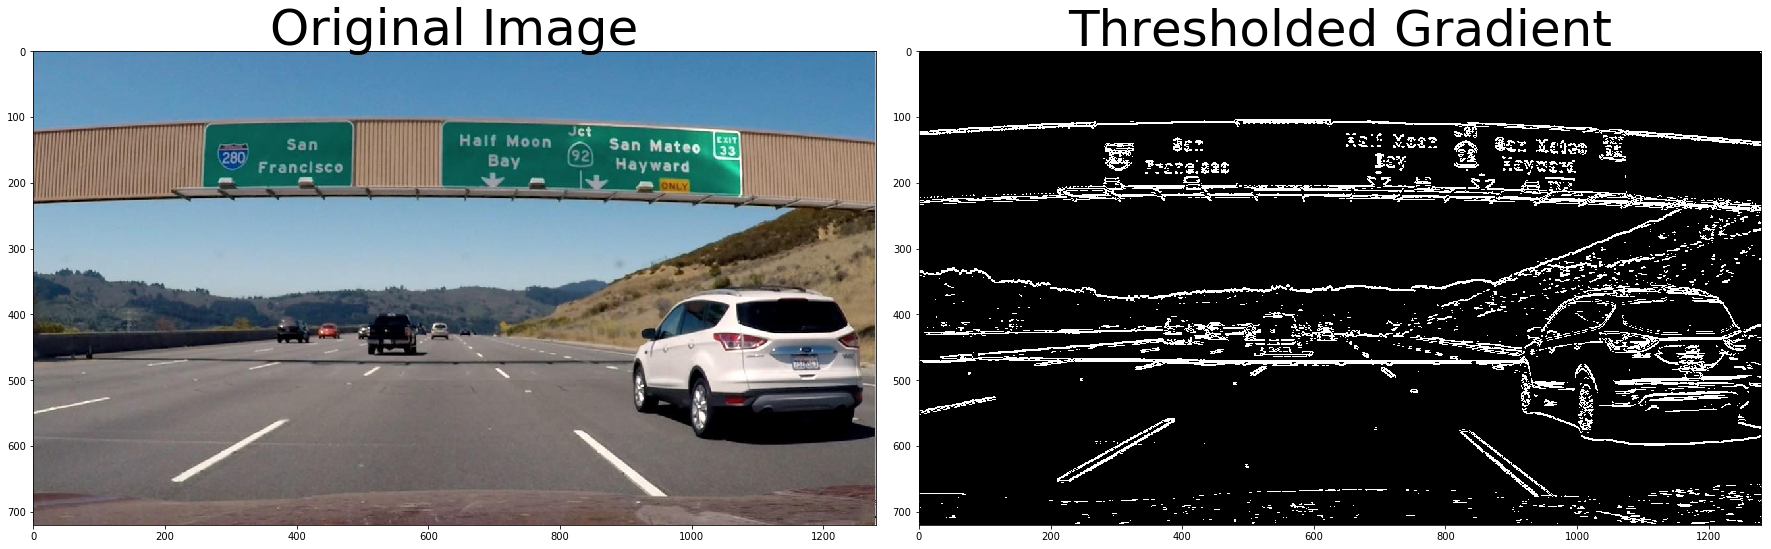

In [24]:
# Run the function
grad_binary = abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)